In [1]:
import os
import glob
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

# Extract data from tf.summary file

In [2]:

# Constant
SUMMARY_DIR = '../Double_DDPG_Results_no_monitor' # directory save job output

# Investigated Parameters
action_space_types = ['continuous', 'discrete']
environments = {'continuous':['BipedalWalker-v2', 'BipedalWalkerHardcore-v2', 'LunarLanderContinuous-v2',
                              'MountainCarContinuous-v0', 'Pendulum-v0',
                              'RoboschoolInvertedPendulum-v1', 'RoboschoolInvertedPendulumSwingup-v1',
                              'RoboschoolInvertedDoublePendulum-v1','RoboschoolReacher-v1',
                              'RoboschoolHopper-v1','RoboschoolWalker2d-v1',
                              'RoboschoolHalfCheetah-v1','RoboschoolAnt-v1', 
                              'RoboschoolHumanoid-v1', 'RoboschoolHumanoidFlagrun-v1', 
                              'RoboschoolHumanoidFlagrunHarder-v1', 'RoboschoolAtlasForwardWalk-v1',
                              'RoboschoolPong-v1'],
                'discrete':['LunarLander-v2',
                            'Acrobot-v1', 'CartPole-v1', 'MountainCar-v0']}

# Continuous tasks:
# 1. BipedalWalker-v2        : 2019, Feb. 14, 23:30 Cedar (done)
# 2. BipedalWalkerHardcore-v2: 2019, Feb. 17, 21:45 Cedar (submitted)
# 3. LunarLanderContinuous-v2: 2019, Feb. 18, 01:35 Graham (submitted)
# 4. MountainCarContinuous-v0: 2019, Feb. 17, 20:05 Graham (submitted)
# 5. Pendulum-v0             : 2019, Feb. 17, 20:05 Graham(submitted)

# 6. RoboschoolAnt-v1        : 2019, Feb. 19, 14:35 Cedar(submitted)
# 7. RoboschoolHalfCheetah-v1: 2019, Feb. 19, 14:45 Cedar(submitted)
# 8. RoboschoolHopper-v1     : 2019, Feb. 19, 14:50 Cedar(submitted)
# 9. RoboschoolWalker2d-v1   : 2019, Feb. 19, 14:55 Cedar(submitted)
#10. RoboschoolHumanoid-v1   : 2019, Feb. 19, 15:35 Graham(submitted)
#11. RoboschoolHumanoidFlagrun-v1: 2019, Feb. 19, 15:45 Graham(submitted)

# Discrete tasks:
# 1. LunarLander-v2          : 2019, Feb. 17, 01:26
# 2. Acrobot-v1              : 2019, Feb. 17, 01:05 
# 3. CartPole-v1             : 2019, Feb. 17, 01:15
# 4. MountainCar-v0          : 2019, Feb. 17, 01:21

# environments = {'continuous':[],
#                 'discrete':['Pendulum-v0']}

ddpg_methods = ['ddpg', 'doule_ddpg']
target_net_update_method = ['softcopy', 'hardcopy']
exploration_strategies = ['action_noise', 'epsilon_greedy']
random_seeds = [1, 2, 3, 4, 5]
run_num = 10


summary_df = pd.DataFrame(columns = ['action_space_types','environments','ddpg_methods',
                                     'target_net_update_method','exploration_strategies',
                                     'random_seeds', 'run_num', 'episode', 
                                     'reward', 'Qmax'])
summary_all = {}
job_count = 0
# Create Job Scripts:
# 1. Action space type
for action_space_type in action_space_types:
    # 2. Environments
    for index, env in enumerate(environments[action_space_type]):
        print('Processing environment: {}'.format(env))
        #task_summary_all_dir = os.path.join(SUMMARY_DIR, action_space_type, env)
        # 3. DDPG method: ddpg or double-ddpg
        for ddpg_name in ddpg_methods:
            # 4. Target net update methods
            for target_net_update in target_net_update_method:
                # 5. Exploration strategies    
                for exploration in exploration_strategies:
                    # 6. Seeds
                    for seed in random_seeds:
                        # 7. Runs
                        for run in range(run_num):
                            # Job Name Example: continuous_env_ddpg_softcopy_action_noise_seed1_run1.sh
                            job_name = '{0}_{1}_{2}_{3}_{4}_seed{5}_run{6}'.format(action_space_type,
                                                                                   env, 
                                                                                   ddpg_name,
                                                                                   target_net_update,
                                                                                   exploration,
                                                                                   seed,
                                                                                   run)
                            
                            # Summary Dir Example: ../Double_DDPG_Results/continuous/env/ddpg_softcopy_action_noise_seed1_run1
                            summary_dir = os.path.join(SUMMARY_DIR,
                                                       action_space_type, 
                                                       env,
                                                       '{0}_{1}_{2}_seed{3}_run{4}'.format(ddpg_name,
                                                                                           target_net_update,
                                                                                           exploration,
                                                                                           seed,
                                                                                           run))
                            
                            for filename in glob.iglob(os.path.join(summary_dir, 'events.out.tfevents.*')):
                                #print('file: {}'.format(filename))
                                Reward_episode = []
                                Qmax_Value_episode = []
                                for i, event in enumerate(tf.train.summary_iterator(filename)):
                                    # Skip three records: general info
                                    if i <3:
                                        continue
                                    episode_num = event.step
                                    Reward =0
                                    Qmax_Value = 0
                                    for value in event.summary.value: # value.tag: [Reward, Qmax_Value]
                                        if value.tag == 'Reward':
                                            Reward = value.simple_value
                                        if value.tag == 'Qmax_Value':
                                            Qmax_Value = value.simple_value
                                    Reward_episode.append(Reward)
                                    Qmax_Value_episode.append(Qmax_Value)
                                #print('length Reward_episode:{}'.format(len(Reward_episode)))
                                #print('length Qmax_Value_episode:{}'.format(len(Qmax_Value_episode)))
                                summary_all[job_name] = pd.DataFrame(np.column_stack((Reward_episode, Qmax_Value_episode)),
                                                                     columns = ['Reward', 'Qmax_Value'])

                                    

Processing environment: BipedalWalker-v2
Processing environment: BipedalWalkerHardcore-v2
Processing environment: LunarLanderContinuous-v2
Processing environment: MountainCarContinuous-v0
Processing environment: Pendulum-v0
Processing environment: RoboschoolInvertedPendulum-v1
Processing environment: RoboschoolInvertedPendulumSwingup-v1
Processing environment: RoboschoolInvertedDoublePendulum-v1
Processing environment: RoboschoolReacher-v1
Processing environment: RoboschoolHopper-v1
Processing environment: RoboschoolWalker2d-v1
Processing environment: RoboschoolHalfCheetah-v1
Processing environment: RoboschoolAnt-v1
Processing environment: RoboschoolHumanoid-v1
Processing environment: RoboschoolHumanoidFlagrun-v1
Processing environment: RoboschoolHumanoidFlagrunHarder-v1
Processing environment: RoboschoolAtlasForwardWalk-v1
Processing environment: RoboschoolPong-v1
Processing environment: LunarLander-v2
Processing environment: Acrobot-v1
Processing environment: CartPole-v1
Processing e

# Extract average reward for each setting of each task

In [3]:

task_results_reward = {}
task_results_qmax = {}
for action_space_type in action_space_types:
    # 2. Environments
    for index, env in enumerate(environments[action_space_type]):
        env_pd_reward = pd.DataFrame()
        env_pd_qmax = pd.DataFrame()
        columns = []
        # 3. DDPG method: ddpg or double-ddpg
        for ddpg_name in ddpg_methods:
            # 4. Target net update methods
            for target_net_update in target_net_update_method:
                # 5. Exploration strategies    
                for exploration in exploration_strategies:
                    
                    setting_name = '{0}_{1}_{2}_{3}_{4}'.format(action_space_type,
                                                                env, 
                                                                ddpg_name,
                                                                target_net_update,
                                                                exploration)
                    # Average among seeds and runs
                    average_df_reward = pd.DataFrame()
                    average_df_qmax = pd.DataFrame()
                    for f in summary_all.keys():
                        if setting_name in f:
                            average_df_reward = pd.concat([average_df_reward,
                                                           summary_all[f]['Reward']], axis = 1)
                            average_df_qmax = pd.concat([average_df_qmax,
                                                           summary_all[f]['Qmax_Value']], axis = 1)
                    avg_reward = average_df_reward.mean(axis=1)
                    avg_reward.columns = [setting_name]
                    avg_qmax = average_df_qmax.mean(axis=1)
                    avg_qmax.columns = [setting_name]
                    columns.append(setting_name)
                    # Concatenate results of different settings
                    if not avg_reward.empty:
                        env_pd_reward = pd.concat([env_pd_reward, avg_reward], axis = 1)
                        env_pd_reward.columns = columns
                        env_pd_qmax = pd.concat([env_pd_qmax, avg_qmax], axis = 1)
                        env_pd_qmax.columns = columns
        # Plot results of a task            
        if not env_pd_reward.empty:
            print('Processed Environment: {}'.format(env))
            #plt.figure()
            #env_pd.plot(legend=True)
            
            task_results_reward[env] = env_pd_reward
            task_results_qmax[env] = env_pd_qmax

Processed Environment: BipedalWalker-v2
Processed Environment: BipedalWalkerHardcore-v2
Processed Environment: LunarLanderContinuous-v2
Processed Environment: MountainCarContinuous-v0
Processed Environment: Pendulum-v0
Processed Environment: RoboschoolHopper-v1
Processed Environment: RoboschoolWalker2d-v1
Processed Environment: RoboschoolHalfCheetah-v1
Processed Environment: RoboschoolAnt-v1
Processed Environment: RoboschoolHumanoid-v1
Processed Environment: RoboschoolHumanoidFlagrun-v1
Processed Environment: RoboschoolHumanoidFlagrunHarder-v1
Processed Environment: RoboschoolAtlasForwardWalk-v1
Processed Environment: RoboschoolPong-v1


/Users/jack.lingheng.meng/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


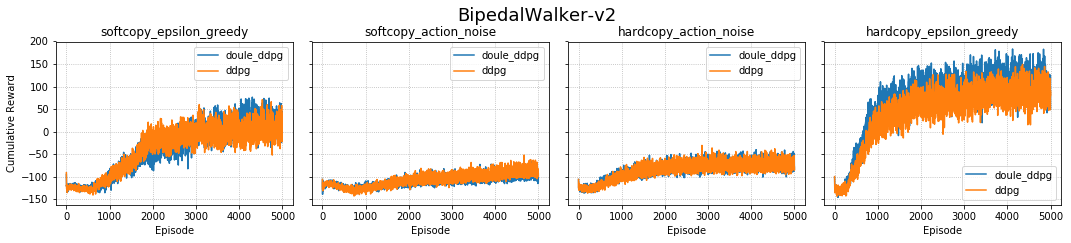

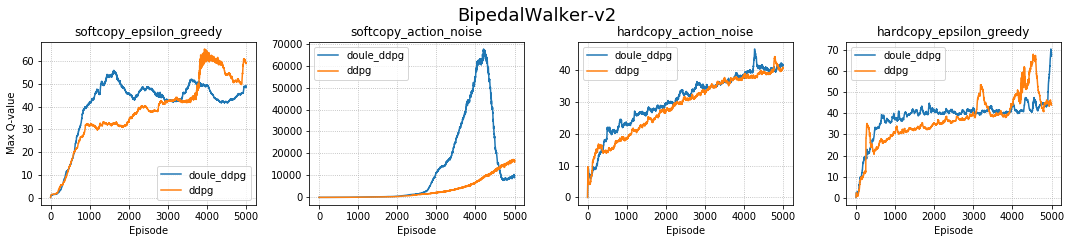

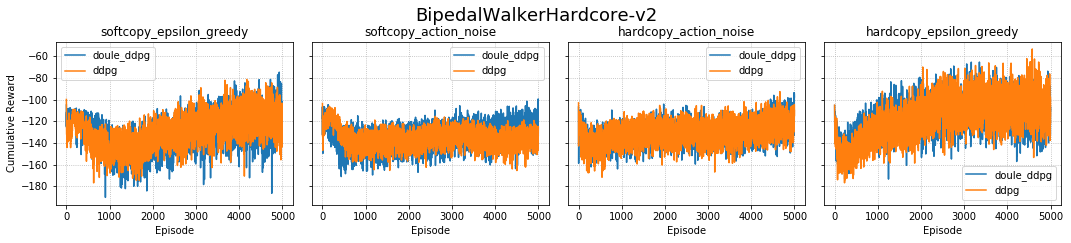

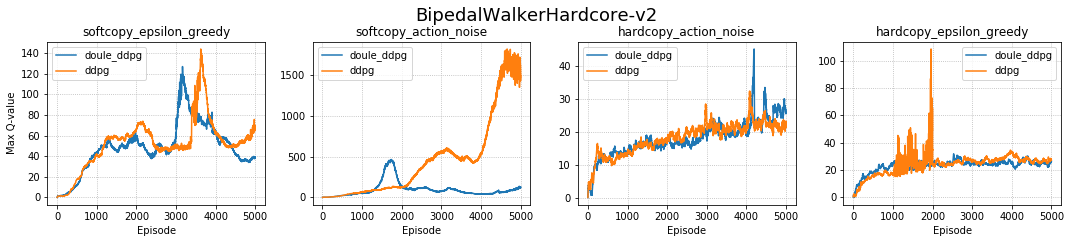

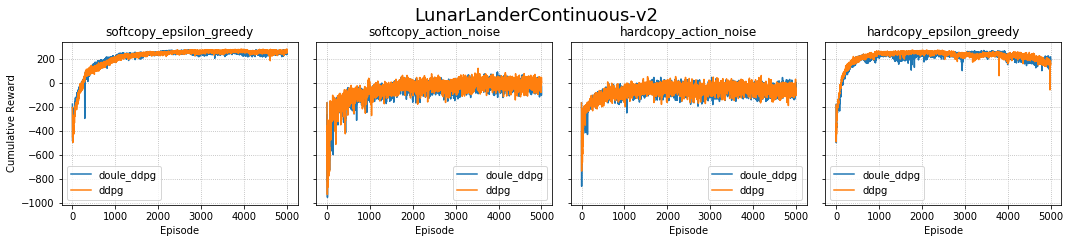

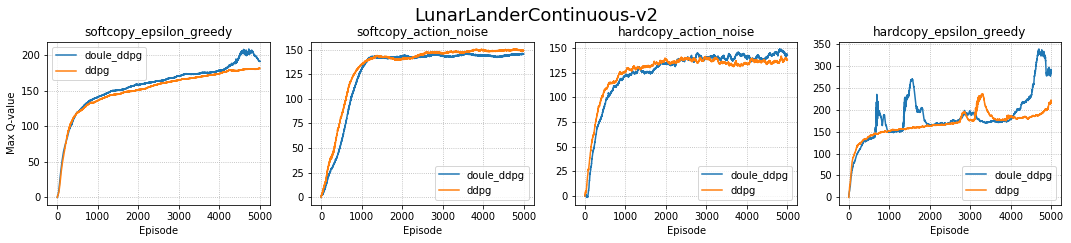

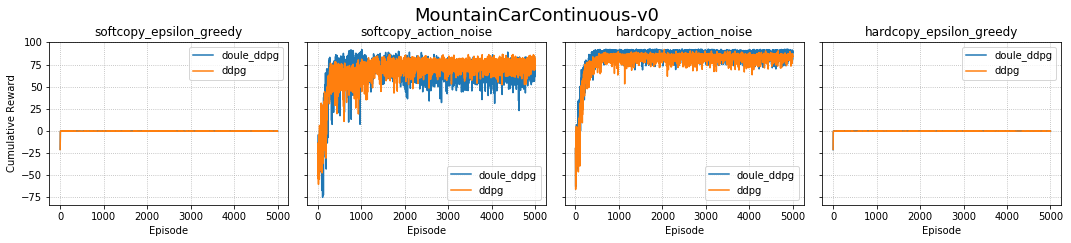

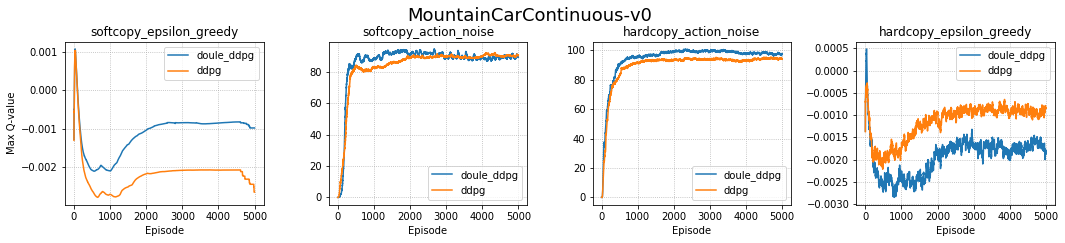

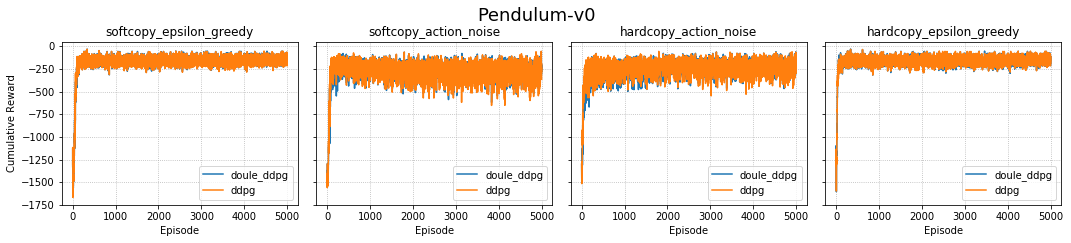

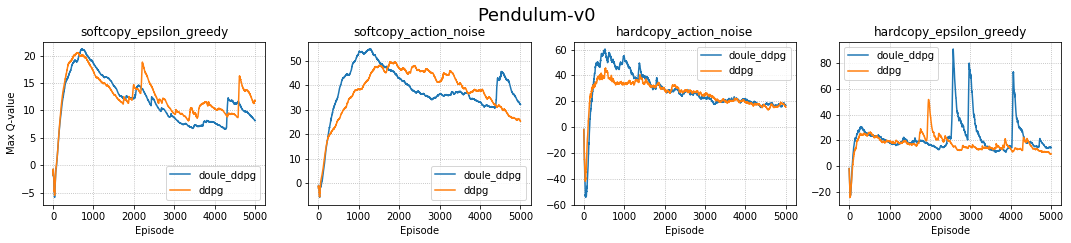

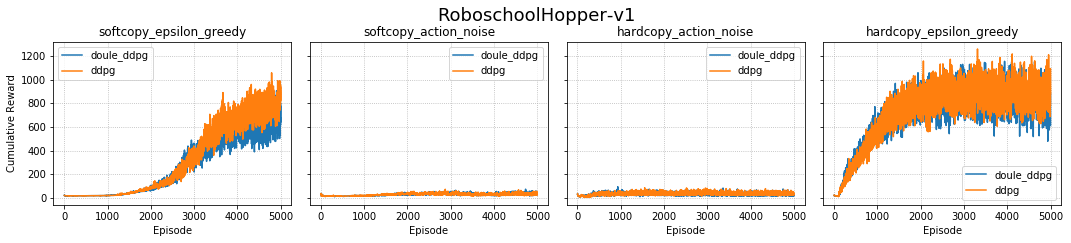

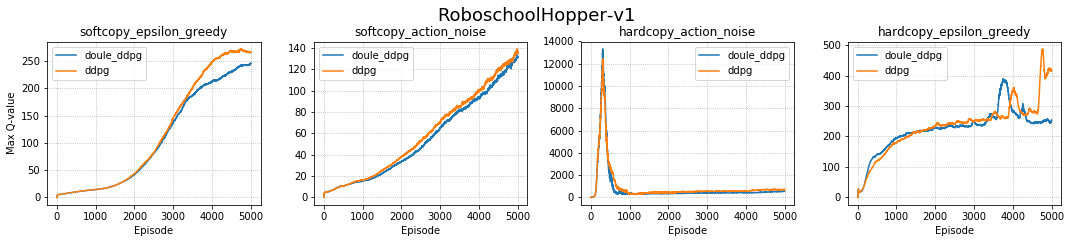

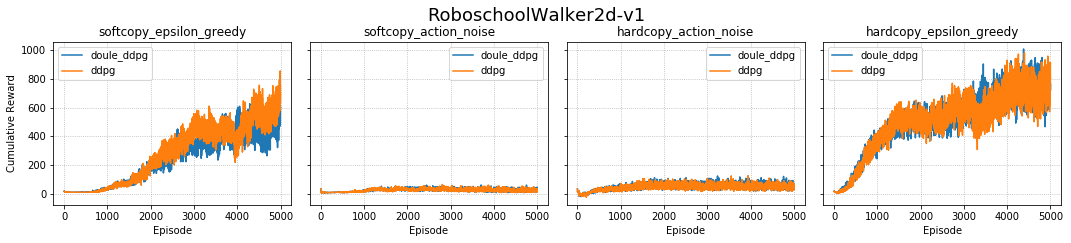

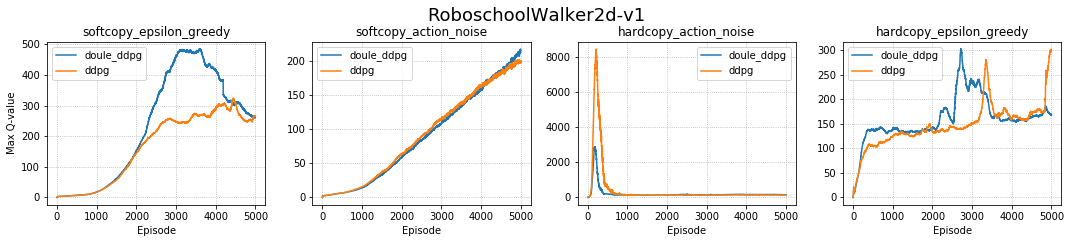

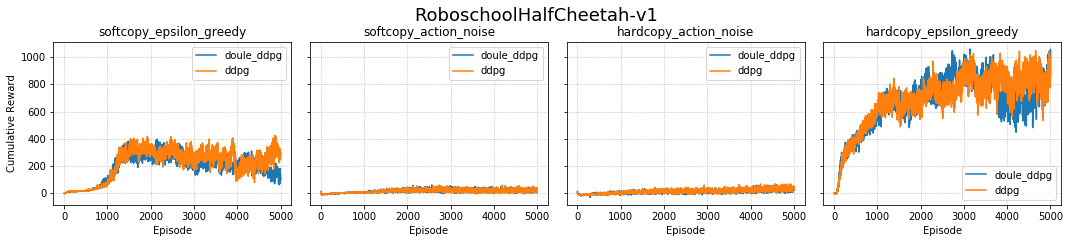

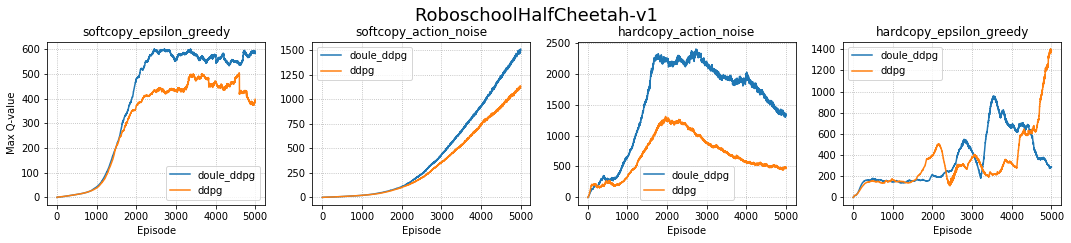

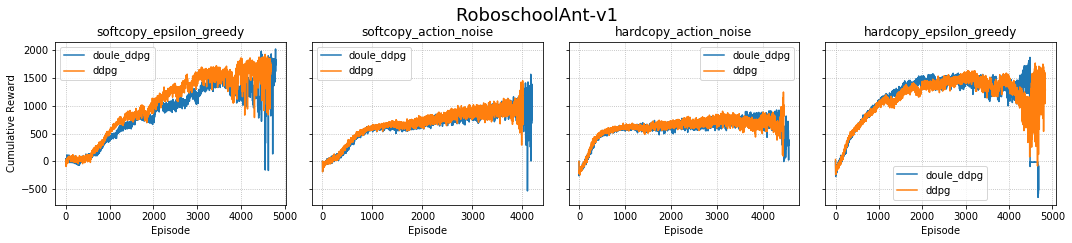

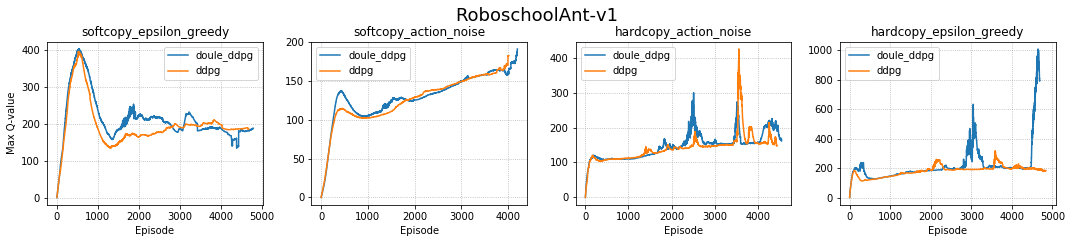

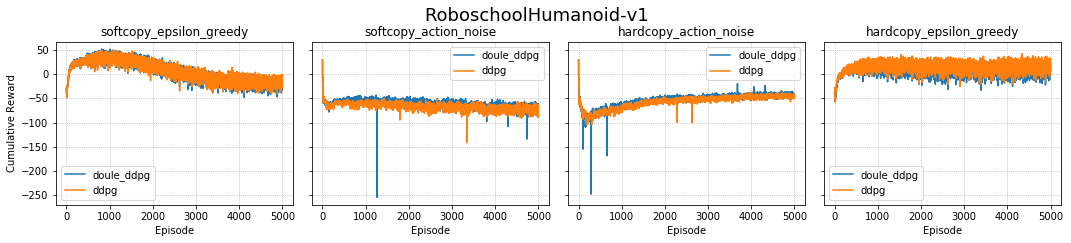

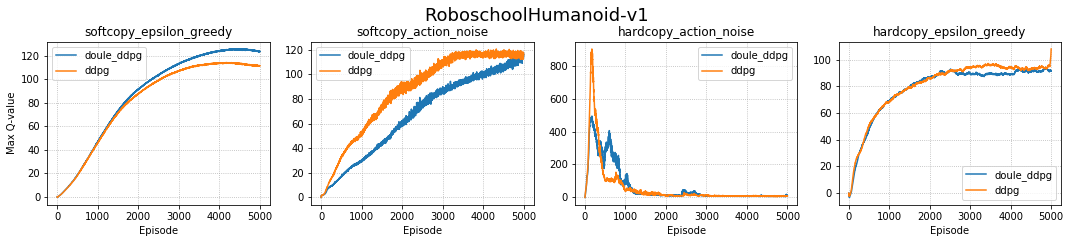

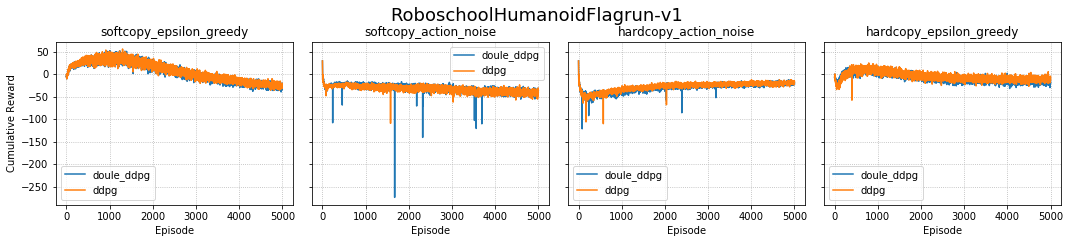

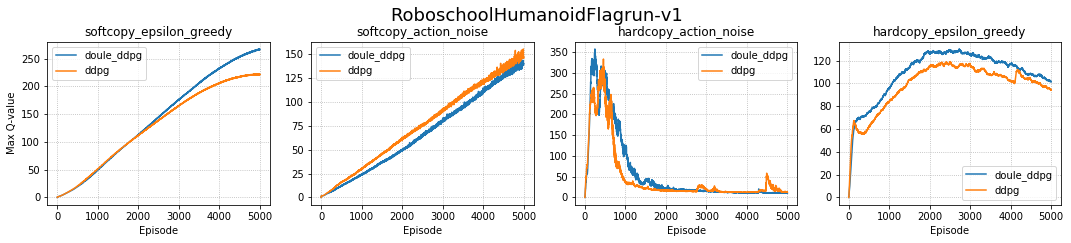

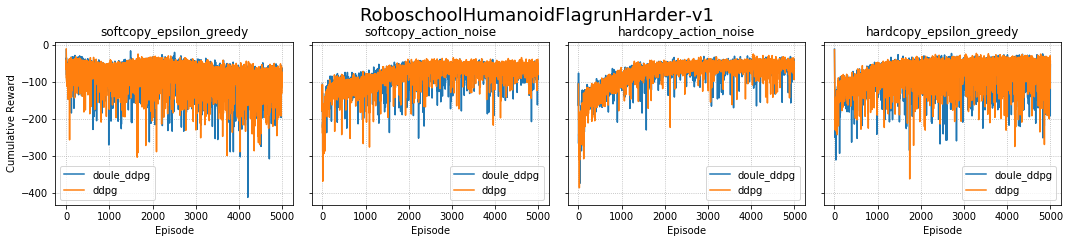

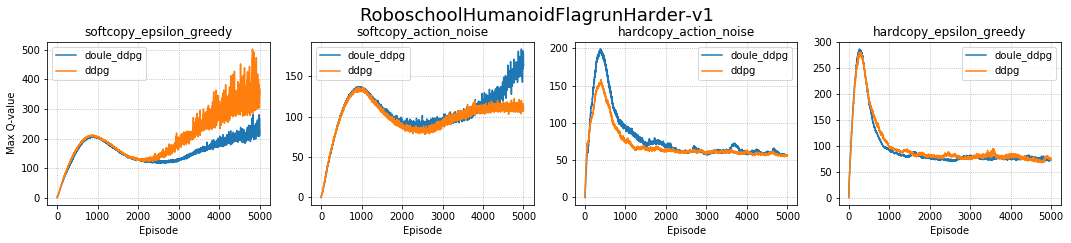

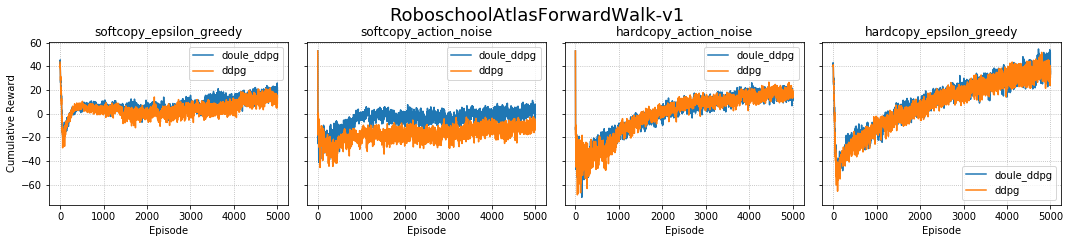

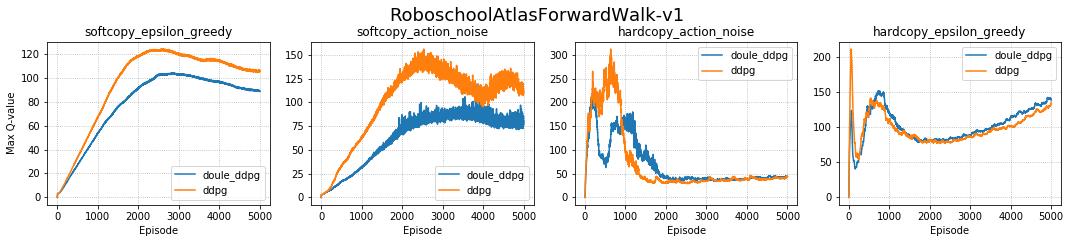

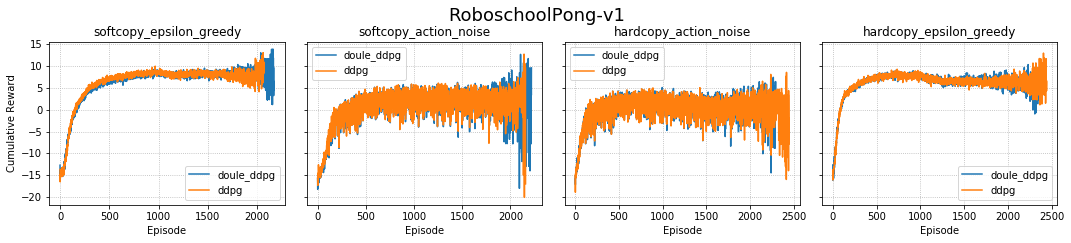

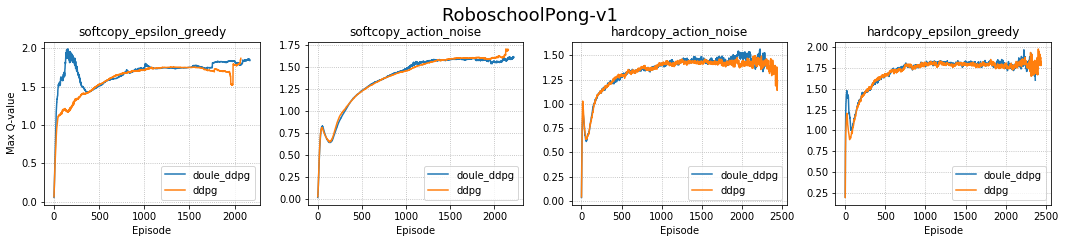

In [6]:
def plot_compare_double_ddpg_and_ddpg(task_results, env_name= 'BipedalWalker-v2', data_type = 'Cumulative Reward'):
    """
    Plot figures to compare Double-DDPG and DDPG with different settings.
    """
    settings = ['softcopy_epsilon_greedy', 'softcopy_action_noise', 
                'hardcopy_action_noise', 'hardcopy_epsilon_greedy']
    ddpg_methods = ['doule_ddpg', 'ddpg']
    
    if data_type == 'Cumulative Reward':
        sharey = True
    else:
        sharey = False
    fig, axs = plt.subplots(1, len(settings), figsize=(15, 3.5), sharey=sharey)
    fig.suptitle('{}'.format(env_name), fontsize=18)
    for i, s in enumerate(settings):
        for ddpg_type in ddpg_methods:
            d_tmp = task_results[env_name]['continuous_{}_{}_{}'.format(env_name, ddpg_type, s)]
            axs[i].plot(d_tmp)
        axs[i].set_xlabel('Episode')
        if i == 0:
            axs[i].set_ylabel('{}'.format(data_type))
        axs[i].set_title('{}'.format(s))
        axs[i].legend(ddpg_methods)
        axs[i].grid(linestyle=':')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    

for env in task_results_reward.keys():
    if not task_results_reward[env].empty:
        # Plot Cummulative Reward
        plot_compare_double_ddpg_and_ddpg(task_results_reward, env, 'Cumulative Reward')
        # Plot Qmax_Value
        plot_compare_double_ddpg_and_ddpg(task_results_qmax, env, 'Max Q-value')
        
